## California House Pricing Dataset

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [3]:
# =========== IMPORT LIBRARIES ===========
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geopandas.tools as gplt
import geopandas.plotting as gplt

In [5]:
# =========== READ DATA ===========
df = pd.read_csv('housing.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
# Summary statistics by category (ocean proximity) for target variable
df.groupby('ocean_proximity')['median_house_value'].describe()

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,240084.285464,106124.292213,17500.0,164100.0,214850.0,289100.0,500001.0
INLAND,6551.0,124805.392001,70007.908494,14999.0,77500.0,108500.0,148950.0,500001.0
ISLAND,5.0,380440.000000,80559.561816,287500.0,300000.0,414700.0,450000.0,450000.0
NEAR BAY,2290.0,259212.311790,122818.537064,22500.0,162500.0,233800.0,345700.0,500001.0
NEAR OCEAN,2658.0,249433.977427,122477.145927,22500.0,150000.0,229450.0,322750.0,500001.0


In [18]:
# Let's show all columns with missing data as well
df[df.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [69]:
columns_with_nan = df.columns[df.isna().any()].tolist()

print("The columns with NaN values are :", columns_with_nan)

The columns with NaN values are : ['total_bedrooms']


We now check the amount of NaN by the category ocean_proximity

In [61]:
category_counts_original = df['ocean_proximity'].value_counts()
print(category_counts_original)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [68]:
df_null = df[df.isnull().any(axis=1)]
df_null= df_null[['ocean_proximity']]
category_counts = df_null['ocean_proximity'].value_counts()
ratio_of_nan = []
for i in range(len(category_counts)):
    ratio_of_nan.append(category_counts[i]/category_counts_original[i])

print(ratio_of_nan) # here is the amount of nan by each category

[0.0111646234676007, 0.008395664784002442, 0.011286681715575621, 0.008733624454148471]


# Data Imputation

The amount of missing data is not to big and the dataset itself is big enough to conduct a linear regression, therefore we propose to drop the missing values

In [92]:
df_2 = df.dropna()

In [93]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [76]:
# double check that actually we have no missing values: 
df_2[df_2.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


# Exploratory Data Analysis

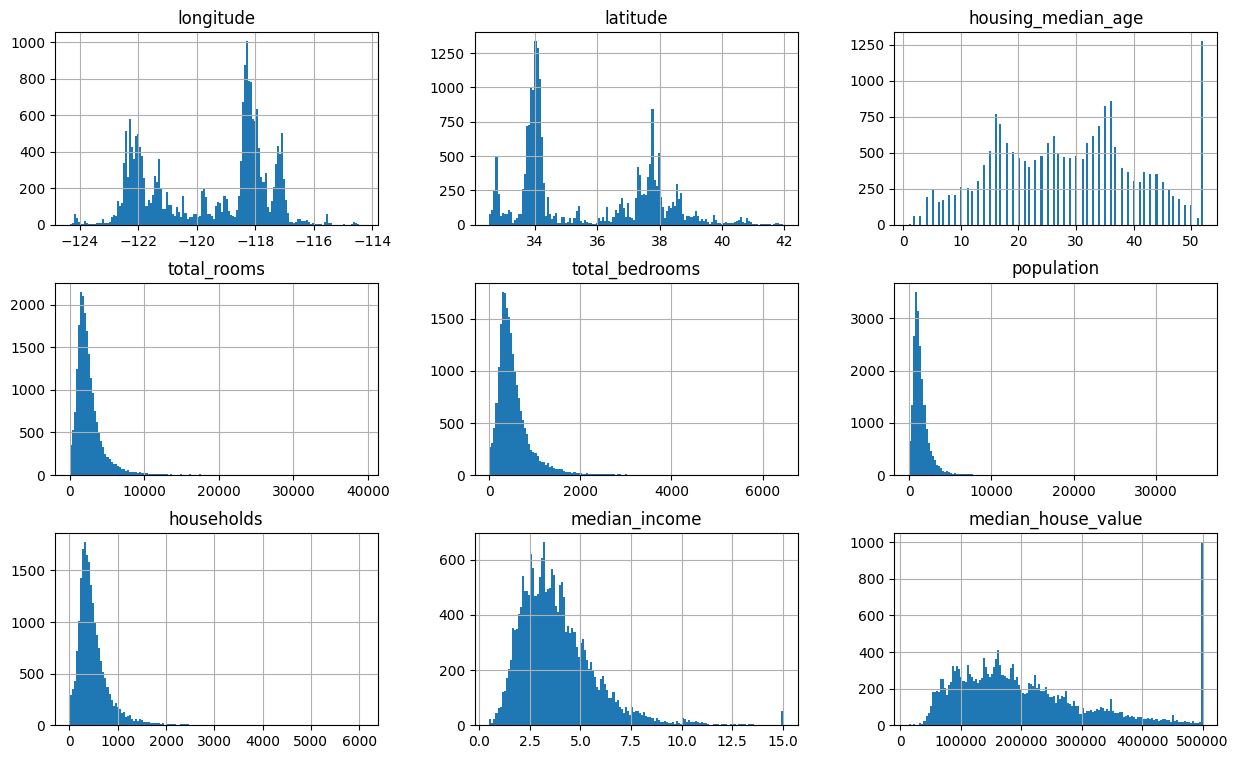

In [25]:
# =========== HISTOGRAMS ===========
# Look up for data distributions, outliers, scales
size_bins = int(np.sqrt(len(df_2)))
df_2.hist(bins=size_bins, figsize=(15,9))
plt.show()

**Patterns & Outliers**

Data distributions which slightly sticks out:

- `housing_median_age` presents an odd behaviour around 52.

- Feature `median_house_value` has an odd peak at its maximum value (around 500k), which may be an outlier.

- Some graphs remind of shifted normal distribution.

- It is clear that the range of value is very different, due to the nature of the data, as a consequence, we suggest to normalize the dataset.

- `households`, `population`, `total_bedrooms` and `total_rooms` represent connected things and have similar distribution which is shifted towards smaller values.


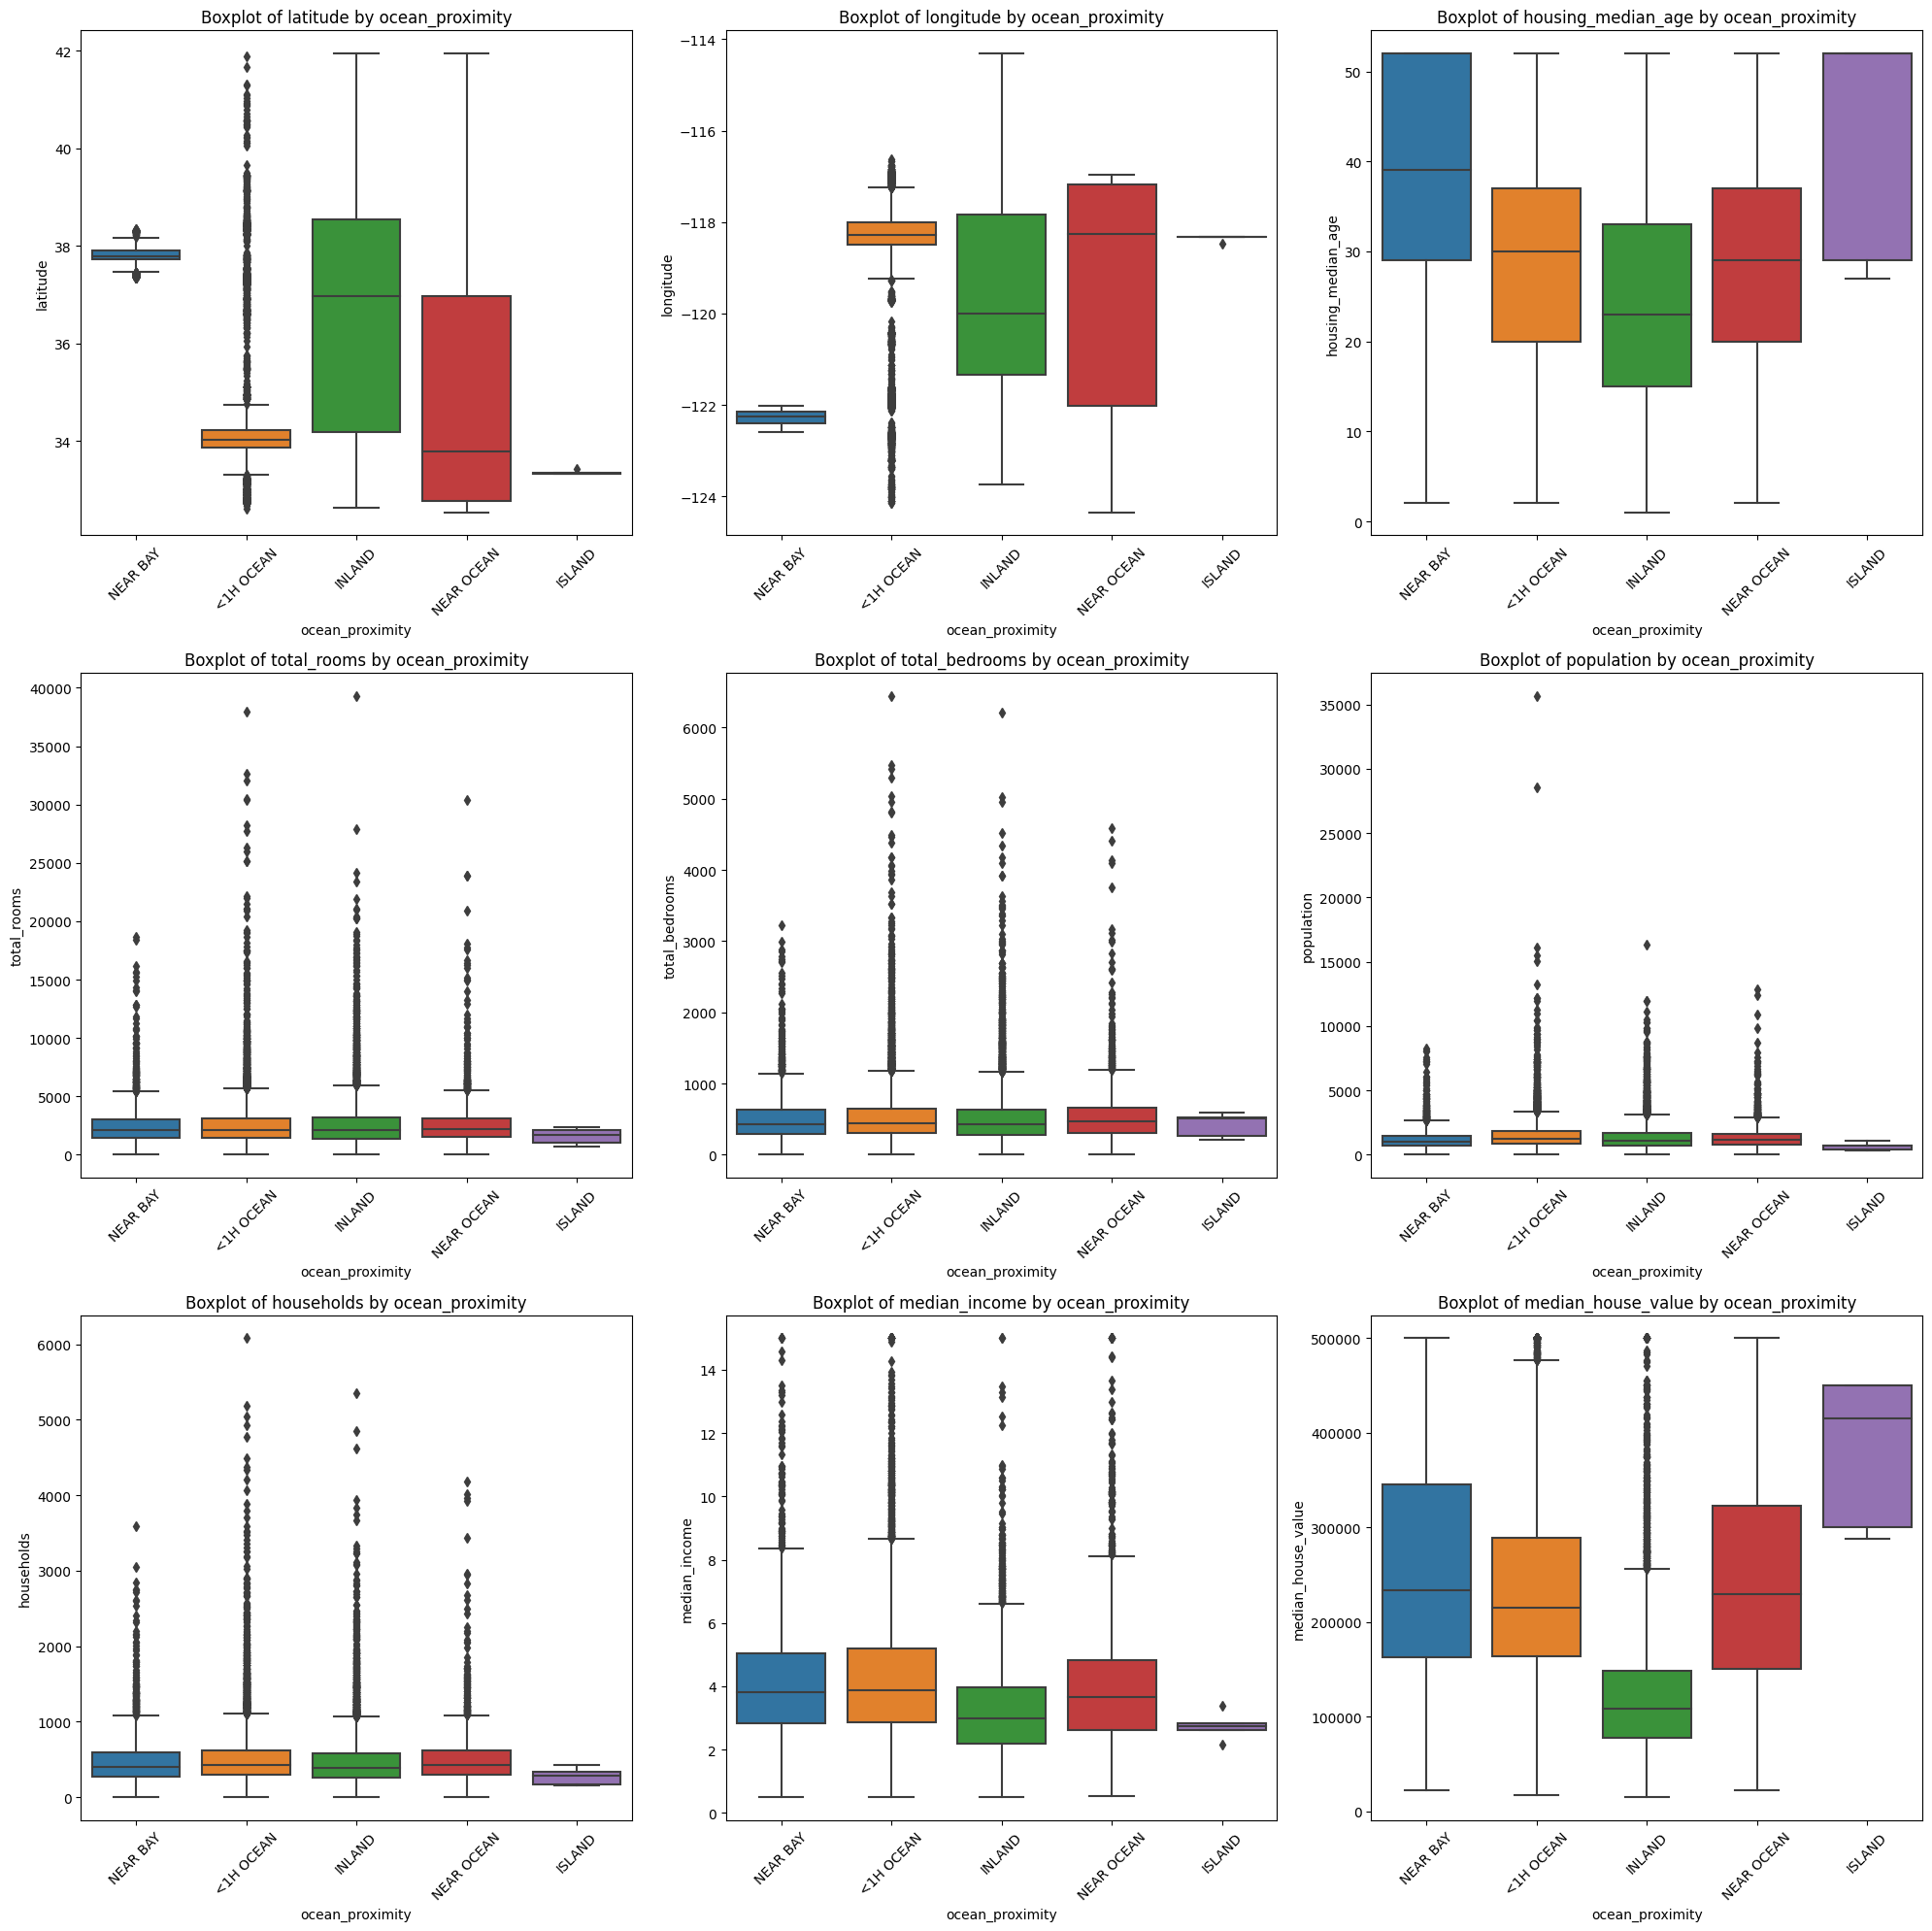

In [57]:
# =========== BOXPLOTS - CATEGORICAL VARIABLE ANALYSIS ===========
numerical_vars = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Define the number of rows and columns for the grid layout
num_rows = 3
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over numerical variables
for i, var in enumerate(numerical_vars):
    # Plot each variable's boxplot in the corresponding subplot
    sns.boxplot(x='ocean_proximity', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} by ocean_proximity')
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('ocean_proximity')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(numerical_vars), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [77]:
# =========== BIVARIATE CORRELATION MATRIX ===========
def corrMat(df, id=False):
    # Select only numerical columns
    df = df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    corr_mat = df.corr().round(2)
    
    # Create a mask for the upper triangle
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 6))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, center=0, 
                cmap='crest', square=True, linewidths=2, annot=True, cbar=False)
    
    # Display the heatmap
    plt.show()

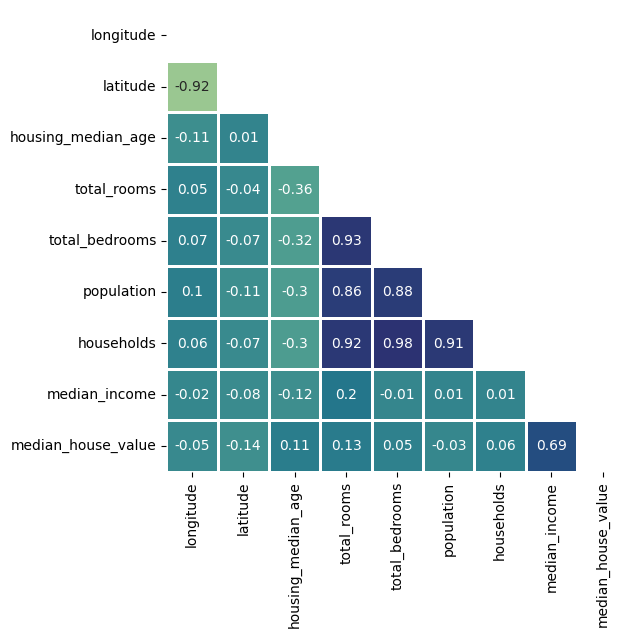

In [78]:
corrMat(df_2)

- Clearly `latitude` and `longitude` are highly correlated.
- Target variable `median_house_value` is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature.
- A correlation of -0.02 & -0.05 (`population`/`longitude`) to the target variable median_house_value might be worth dropping,we should investigate more to understand the nature of this correlation
- Variables `total_rooms`, `households`, `population`, `total_bedrooms` are highly correlated to each other, confirming our past observations

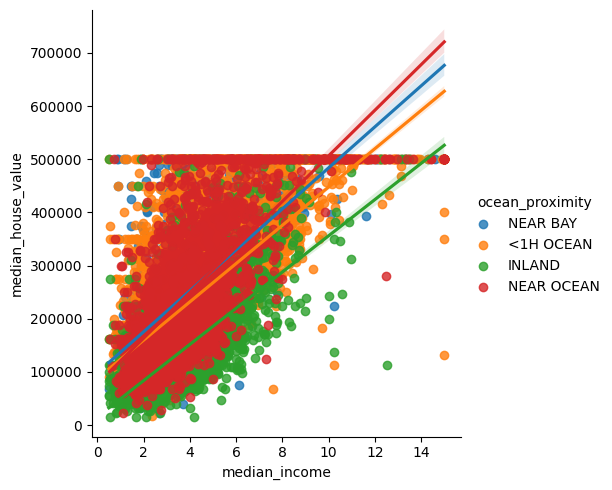

In [58]:
df_filtered = df_2[df_2['ocean_proximity'] != 'ISLAND']
sns.lmplot(data=df_filtered, x='median_income', y='median_house_value', hue='ocean_proximity')

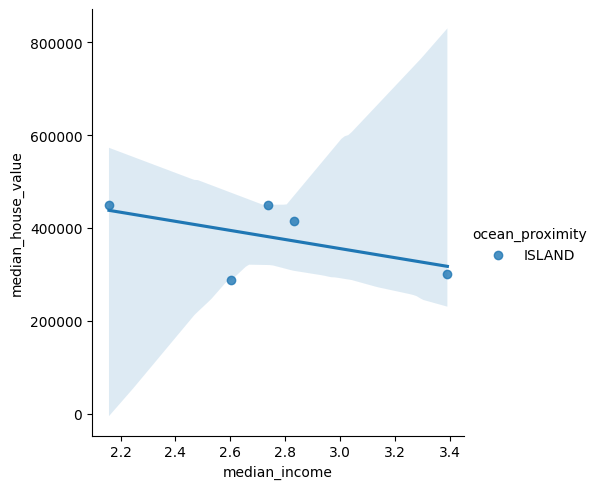

In [59]:
df_filtered = df2[df2['ocean_proximity'] == 'ISLAND']
sns.lmplot(data=df_filtered, x='median_income', y='median_house_value', hue='ocean_proximity')

- After segmenting our data by 'ocean_proximity', we see quite similar positive linear relationships between `median_house_value` and `median_income` within each proximity category.

- In the 'Island' category, this relationship appears less evident, most likely due to the limited amount of data available for that particular category.

## Reviewing Outliers

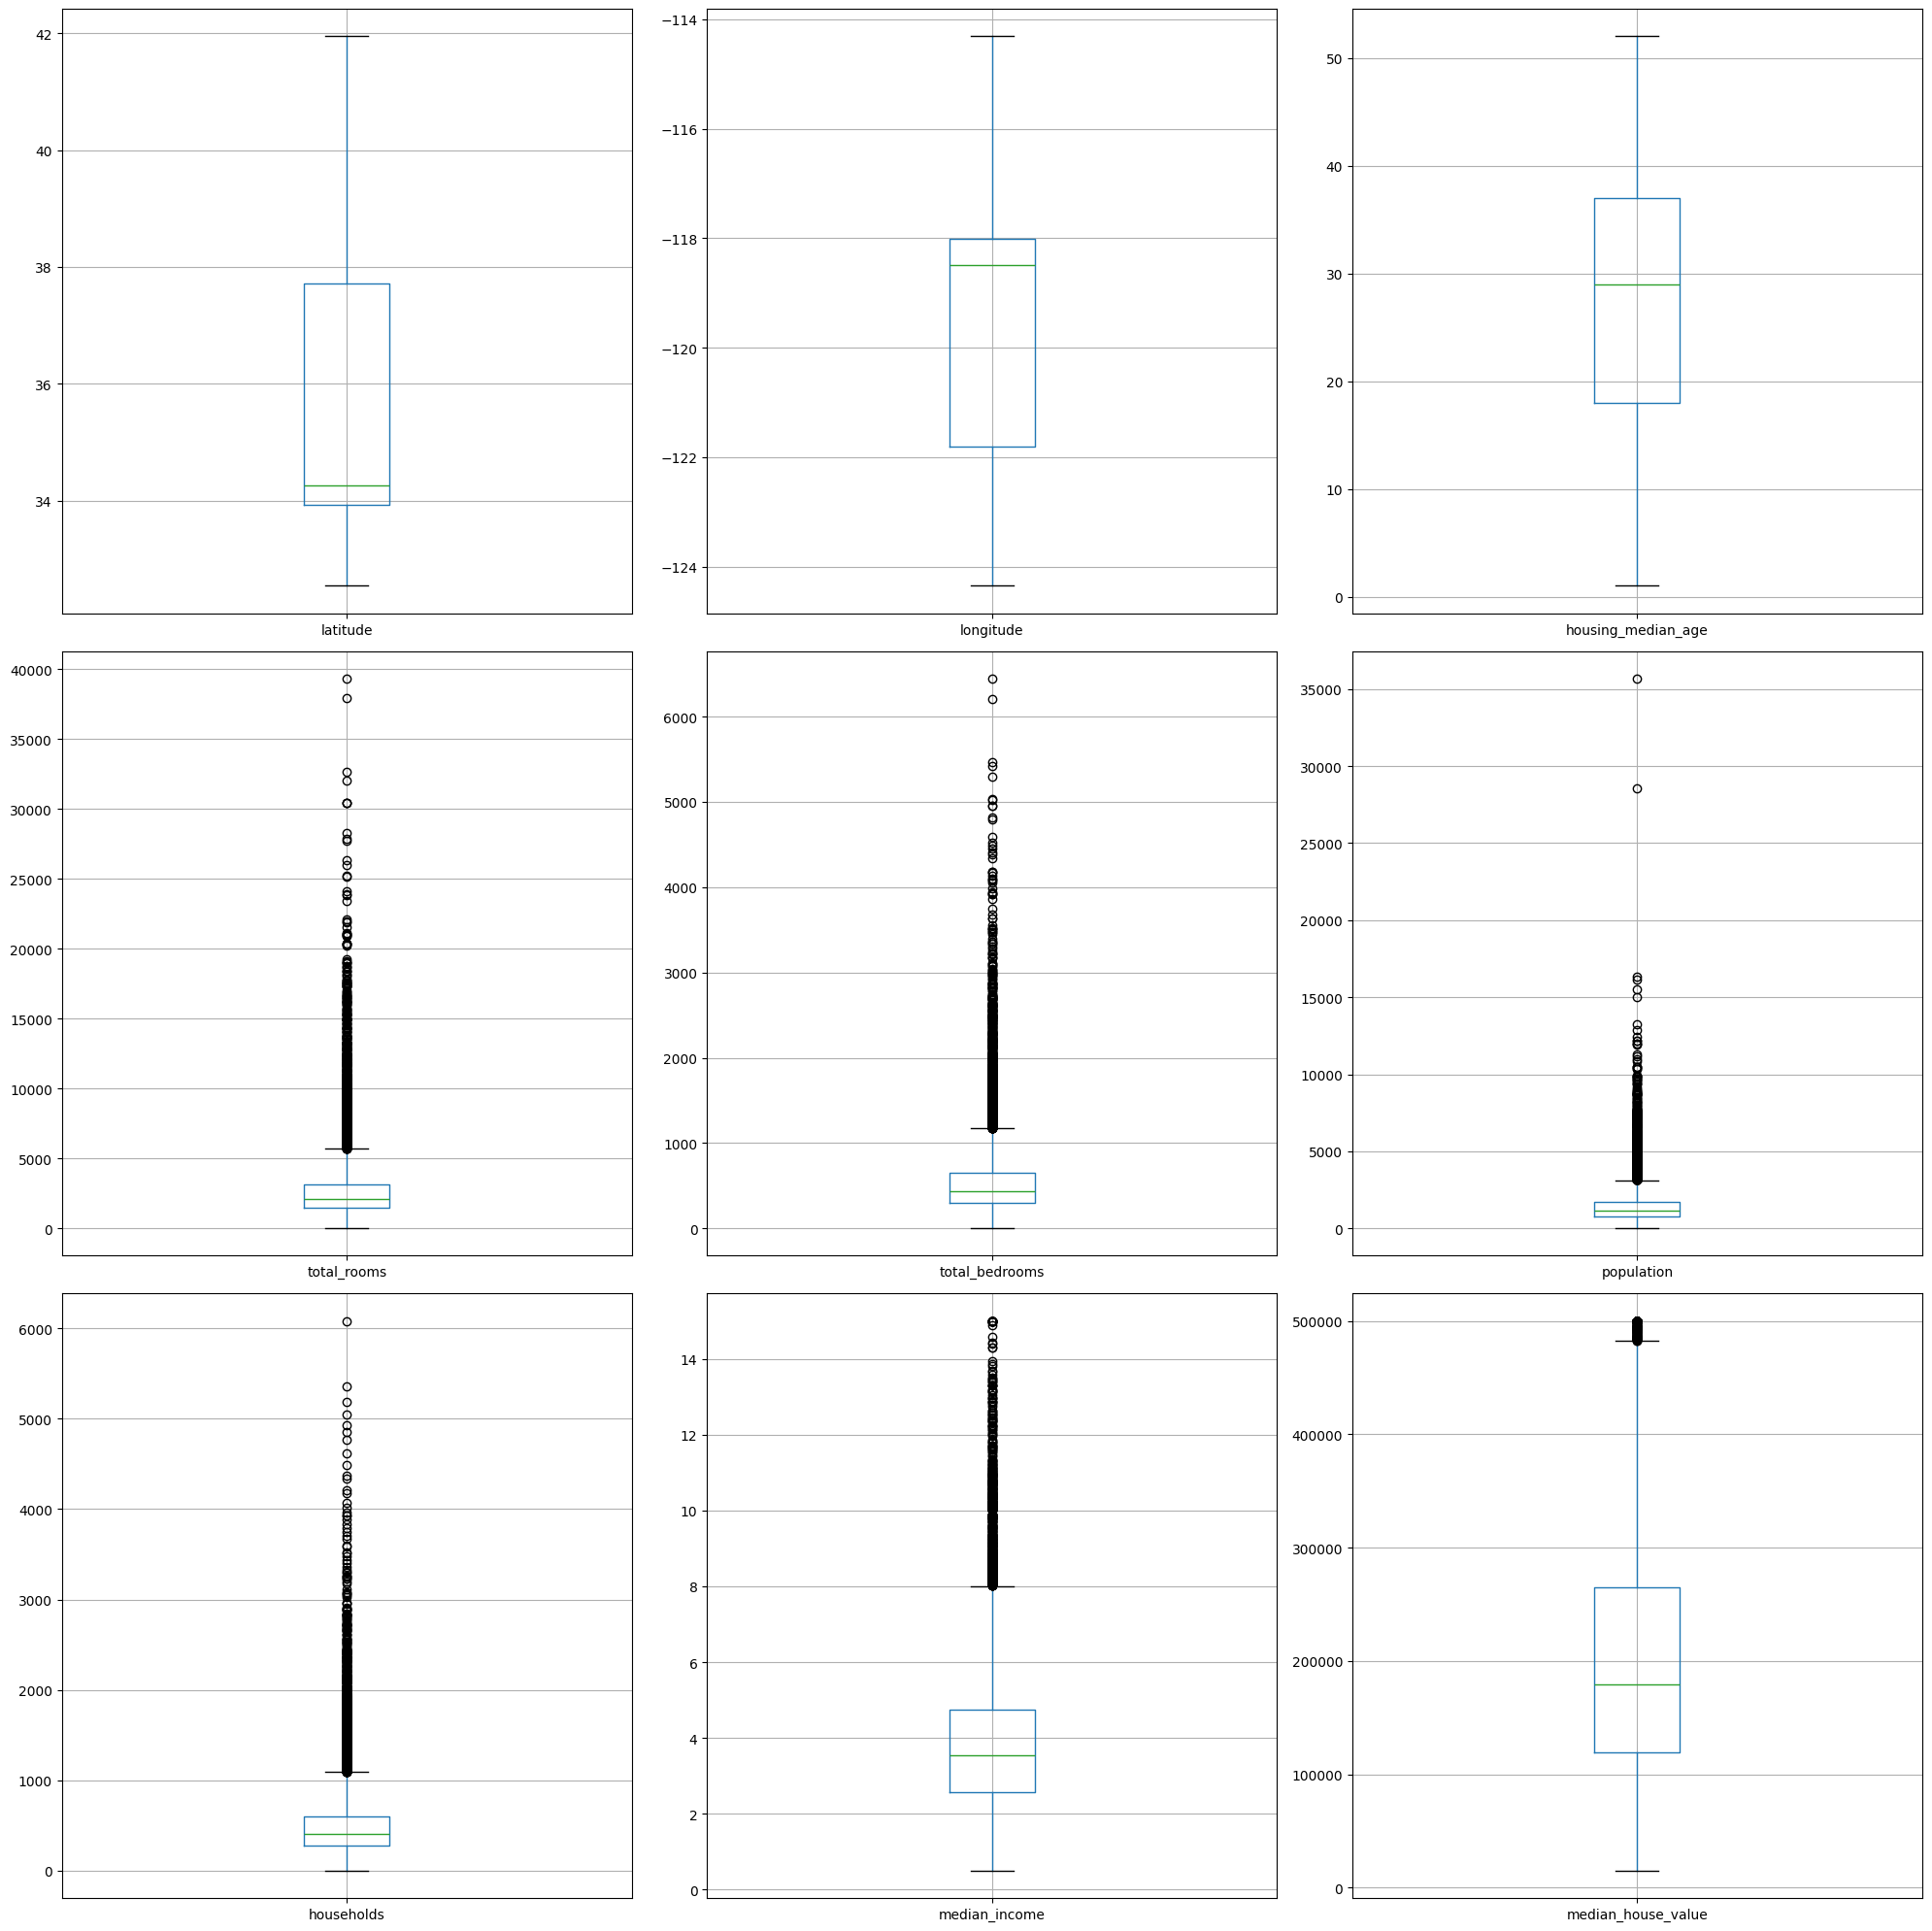

In [81]:
numerical_vars = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

# Iterate over numerical variables
for i, column in enumerate(numerical_vars):
    df.boxplot(column=column, ax=axes[i])

plt.tight_layout()
plt.show()

From the previous plot, we can conclude that the only evident outlier is for median_house_value.

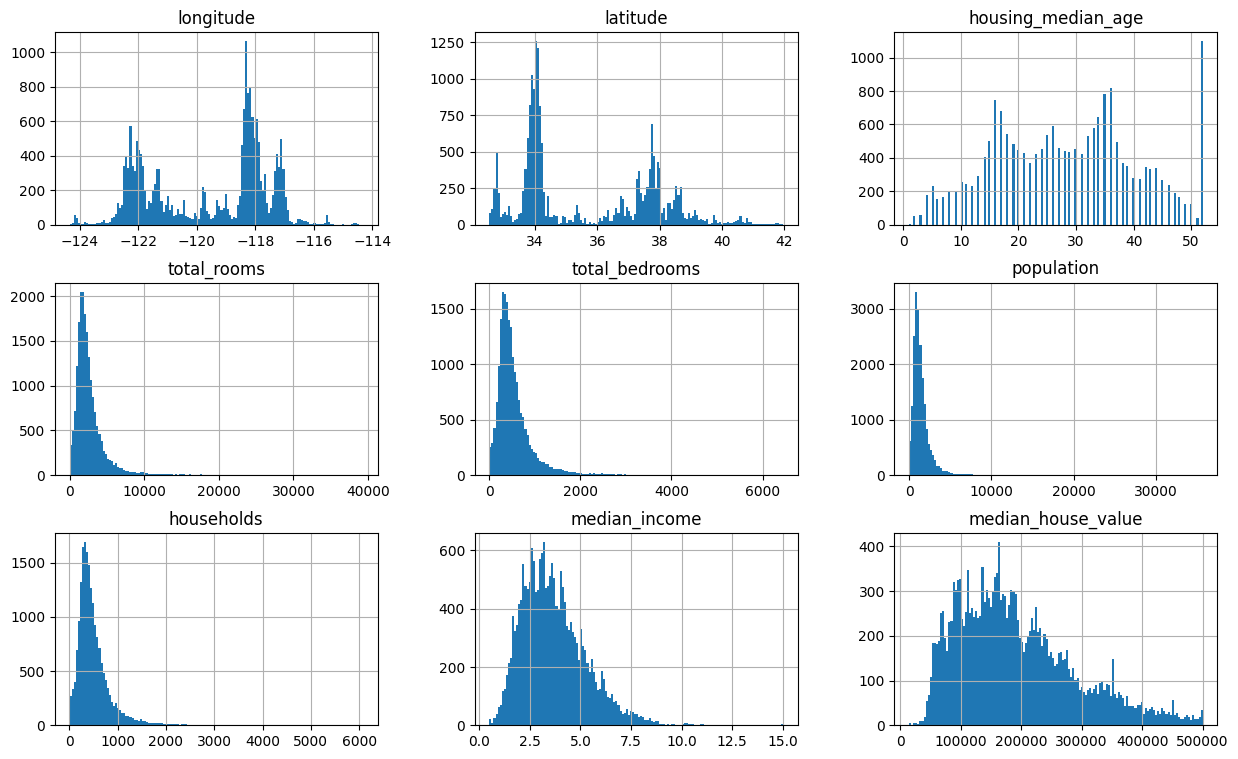

In [83]:
size_bins = int(np.sqrt(len(df_2)))
maxval2 = df_2['median_house_value'].max() # get the maximum value
df2_upd = df_2[df_2['median_house_value'] != maxval2] 
df2_upd.hist(bins=size_bins, figsize=(15,9))
plt.show()

# Final preprocessing: Normalization

In [94]:
# To conclude our analysis, since we have seen a different scale in all our numerical features, we normalize them.
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

scaler = MinMaxScaler()
df_2[features_to_normalize] = scaler.fit_transform(df_2[features_to_normalize])
df_2 = pd.get_dummies(df_2, columns=['ocean_proximity'], dtype=int)



C:\Users\Eddie\AppData\Local\Temp\ipykernel_8588\3811909797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[features_to_normalize] = scaler.fit_transform(df_2[features_to_normalize])


In [ ]:
print(df_2)

In [98]:
df_2.to_csv('housing_light_preprocessing.csv')